In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime
from sklearn.ensemble import IsolationForest
import numpy as np
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv")

In [15]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [17]:
df = df.set_index('timestamp').resample('H').mean().reset_index()
df.head()

,timestamp,value
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5


In [18]:
df['hour'] = df.timestamp.dt.hour

In [21]:
df['weekday'] = df.timestamp.dt.strftime("%A")

In [22]:
df.head()

,timestamp,value,hour,weekday
0,2014-07-01 00:00:00,9485.5,0,Tuesday
1,2014-07-01 01:00:00,5433.0,1,Tuesday
2,2014-07-01 02:00:00,3346.5,2,Tuesday
3,2014-07-01 03:00:00,2216.5,3,Tuesday
4,2014-07-01 04:00:00,2189.5,4,Tuesday


In [23]:
df.tail()

,timestamp,value,hour,weekday
5155,2015-01-31 19:00:00,28288.5,19,Saturday
5156,2015-01-31 20:00:00,24138.0,20,Saturday
5157,2015-01-31 21:00:00,24194.5,21,Saturday
5158,2015-01-31 22:00:00,26515.0,22,Saturday
5159,2015-01-31 23:00:00,26439.5,23,Saturday


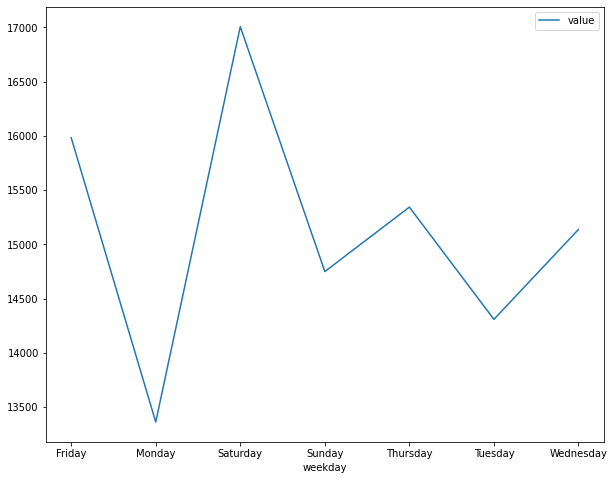

In [25]:
df[['value','weekday']].groupby('weekday').mean().plot()

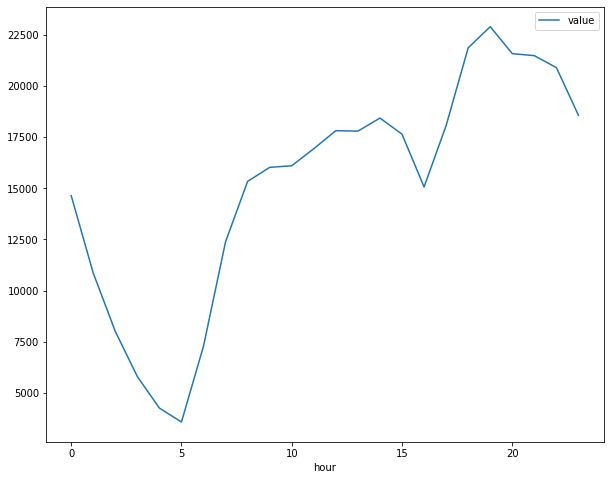

In [26]:
 df[['value','hour']].groupby('hour').mean().plot()

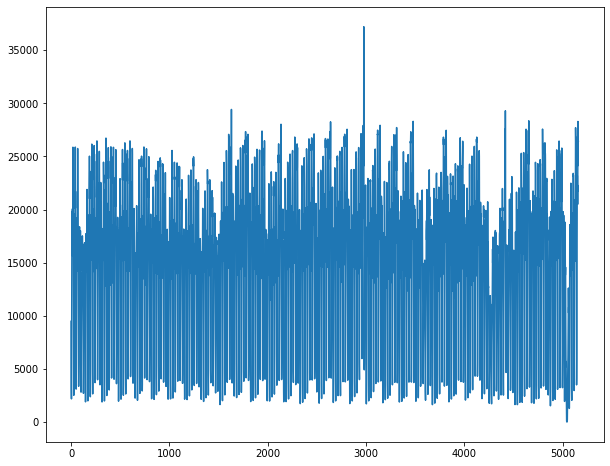

In [28]:
df['value'].plot()

In [30]:
model = IsolationForest(contamination=0.004)
model.fit(df[['value']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.004,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [32]:
df['outliers'] = model.predict(df[['value']])

In [33]:
df.head()

,timestamp,value,hour,weekday,outliers
0,2014-07-01 00:00:00,9485.5,0,Tuesday,1
1,2014-07-01 01:00:00,5433.0,1,Tuesday,1
2,2014-07-01 02:00:00,3346.5,2,Tuesday,1
3,2014-07-01 03:00:00,2216.5,3,Tuesday,1
4,2014-07-01 04:00:00,2189.5,4,Tuesday,1


In [34]:
df.query("outliers==-1")

,timestamp,value,hour,weekday,outliers
1631,2014-09-06 23:00:00,29418.5,23,Saturday,-1
2135,2014-09-27 23:00:00,28024.5,23,Saturday,-1
2639,2014-10-18 23:00:00,28253.5,23,Saturday,-1
2971,2014-11-01 19:00:00,27912.0,19,Saturday,-1
2977,2014-11-02 01:00:00,37204.5,1,Sunday,-1
3143,2014-11-08 23:00:00,27926.0,23,Saturday,-1
3311,2014-11-15 23:00:00,27713.0,23,Saturday,-1
3479,2014-11-22 23:00:00,28299.0,23,Saturday,-1
4417,2015-01-01 01:00:00,29292.0,1,Thursday,-1
4655,2015-01-10 23:00:00,28351.0,23,Saturday,-1


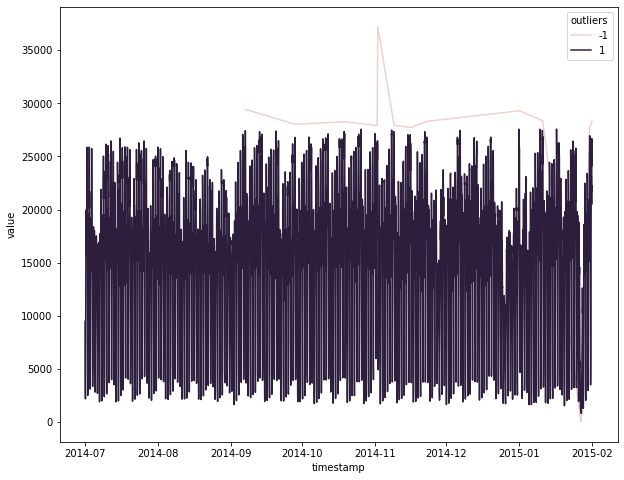

In [35]:
import seaborn as sns
sns.lineplot(x=df.timestamp, y=df.value, hue=df.outliers)

In [36]:
## methd 2

In [38]:
model = IsolationForest()
model.fit(df[['value']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

(array([  3.,   4.,  10.,   2.,   6.,   5.,   5.,   3.,   7.,   5.,   6.,
          8.,   8.,  12.,   6.,  13.,   9.,  11.,  15.,  46.,  15.,  26.,
         22.,  28.,  40.,  93.,  98., 123.,  95., 210., 302., 211., 138.,
        150., 169., 217., 309., 298.,  90.,  31.,  71., 264., 170., 287.,
        118.,  95., 277., 309., 569., 151.]),
 array([-0.22613065, -0.22006412, -0.2139976 , -0.20793107, -0.20186455,
        -0.19579803, -0.1897315 , -0.18366498, -0.17759845, -0.17153193,
        -0.1654654 , -0.15939888, -0.15333236, -0.14726583, -0.14119931,
        -0.13513278, -0.12906626, -0.12299974, -0.11693321, -0.11086669,
        -0.10480016, -0.09873364, -0.09266711, -0.08660059, -0.08053407,
        -0.07446754, -0.06840102, -0.06233449, -0.05626797, -0.05020145,
        -0.04413492, -0.0380684 , -0.03200187, -0.02593535, -0.01986883,
        -0.0138023 , -0.00773578, -0.00166925,  0.00439727,  0.0104638 ,
         0.01653032,  0.02259684,  0.02866337,  0.03472989,  0.04079642,
 

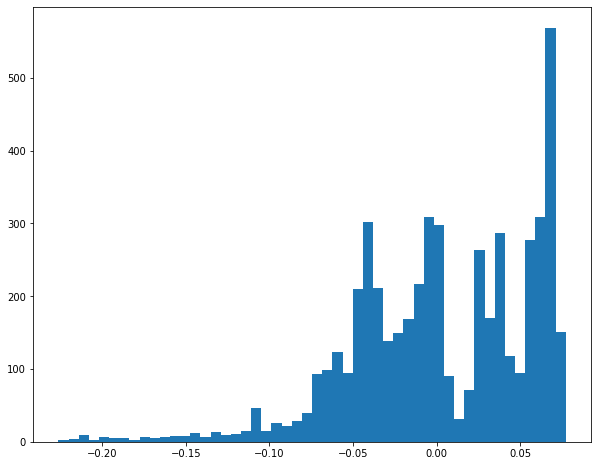

In [39]:
score = model.decision_function(df[['value']])
df['score']=score
plt.hist(score,bins=50)

In [40]:
df.query("score<0.25")

,timestamp,value,hour,weekday,outliers,score
0,2014-07-01 00:00:00,9485.5,0,Tuesday,1,-0.016691
1,2014-07-01 01:00:00,5433.0,1,Tuesday,1,-0.060512
2,2014-07-01 02:00:00,3346.5,2,Tuesday,1,-0.004955
3,2014-07-01 03:00:00,2216.5,3,Tuesday,1,-0.071623
4,2014-07-01 04:00:00,2189.5,4,Tuesday,1,-0.072931
...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,-1,-0.217827
5156,2015-01-31 20:00:00,24138.0,20,Saturday,1,-0.034042
5157,2015-01-31 21:00:00,24194.5,21,Saturday,1,-0.034030
5158,2015-01-31 22:00:00,26515.0,22,Saturday,1,-0.114387
